# OCR 실습

In [13]:
import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt

In [14]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [15]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [16]:
ocr_url = vision_base_url + 'ocr'

## 분석할 이미지를 세팅한다.

In [42]:
image_url = 'https://postfiles.pstatic.net/MjAyMjAyMTdfMTk5/MDAxNjQ1MDY4MDA2OTYy.LVH-DpnhtXVscIlo5GUGrw2kPZgfiwB1jBpMi-gGajIg.ux53__cXdeGY8papNy_KGxg4QmtDrPT9yK7ALqIBLUsg.PNG.hacademia/%EC%A7%A7%EC%9D%80-%EC%98%81%EC%96%B4-%EB%AA%85%EC%96%B8_1.png?type=w966'

In [43]:
img = Image.open(BytesIO(requests.get(image_url).content))

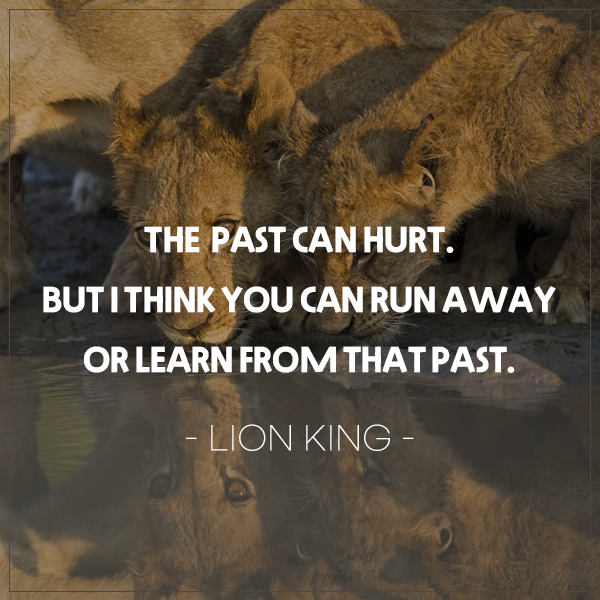

In [44]:
img

In [45]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}
data    = {'url': image_url}

In [46]:
response = requests.post(ocr_url,
                        headers=headers,
                        params=params,
                        json=data)

In [47]:
analysis = response.json()

In [48]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '43,217,513,234',
   'lines': [{'boundingBox': '144,217,311,41',
     'words': [{'boundingBox': '144,226,56,32', 'text': 'THE'},
      {'boundingBox': '212,224,74,30', 'text': 'PAST'},
      {'boundingBox': '293,226,63,27', 'text': 'CAN'},
      {'boundingBox': '364,217,91,36', 'text': 'HURV.'}]},
    {'boundingBox': '43,286,513,56',
     'words': [{'boundingBox': '43,286,61,27', 'text': 'BUT'},
      {'boundingBox': '111,286,7,27', 'text': 'I'},
      {'boundingBox': '124,286,169,56', 'text': 'THINK_YOU'},
      {'boundingBox': '301,286,62,27', 'text': 'CAN'},
      {'boundingBox': '371,286,64,27', 'text': 'RUN'},
      {'boundingBox': '442,286,114,27', 'text': 'AWAY'}]},
    {'boundingBox': '84,346,431,27',
     'words': [{'boundingBox': '84,346,45,27', 'text': 'OR'},
      {'boundingBox': '136,346,96,27', 'text': 'LEARN'},
      {'boundingBox': '240,346,96,27', 'text': 'FROM'},
      {'boundingB

In [49]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '144,226,56,32', 'text': 'THE'},
 {'boundingBox': '212,224,74,30', 'text': 'PAST'},
 {'boundingBox': '293,226,63,27', 'text': 'CAN'},
 {'boundingBox': '364,217,91,36', 'text': 'HURV.'},
 {'boundingBox': '43,286,61,27', 'text': 'BUT'},
 {'boundingBox': '111,286,7,27', 'text': 'I'},
 {'boundingBox': '124,286,169,56', 'text': 'THINK_YOU'},
 {'boundingBox': '301,286,62,27', 'text': 'CAN'},
 {'boundingBox': '371,286,64,27', 'text': 'RUN'},
 {'boundingBox': '442,286,114,27', 'text': 'AWAY'},
 {'boundingBox': '84,346,45,27', 'text': 'OR'},
 {'boundingBox': '136,346,96,27', 'text': 'LEARN'},
 {'boundingBox': '240,346,96,27', 'text': 'FROM'},
 {'boundingBox': '343,346,83,27', 'text': 'THAT'},
 {'boundingBox': '432,346,83,27', 'text': 'PAST.'},
 {'boundingBox': '186,437,11,2', 'text': '-'},
 {'boundingBox': '210,424,81,27', 'text': 'LION'},
 {'boundingBox': '306,424,84,27', 'text': 'KING'},
 {'boundingBox': '403,437,11,2', 'text': '-'}]